In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## we have to check the correlation in the feature

In [9]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
data.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

 - maximum person is of above 50 years old


In [11]:
data.age.median()

55.0

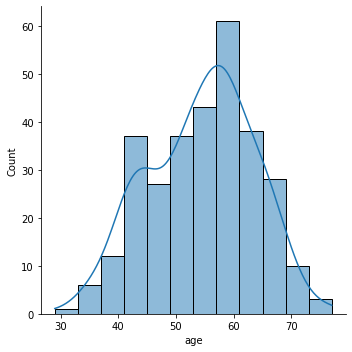

In [12]:
sns.displot(data.age,kde=True)

- comparing number of male to female

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

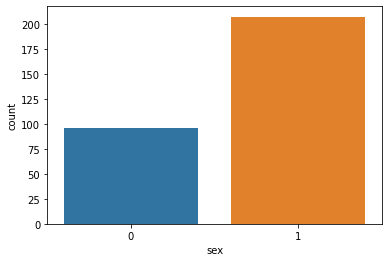

In [13]:
sns.countplot(data['sex'])

- male is just double of female

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

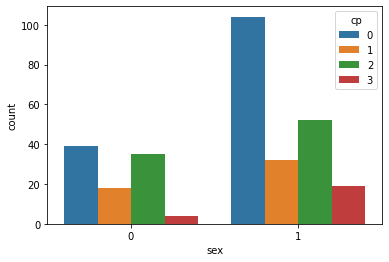

In [14]:
sns.countplot(data['sex'],hue=data['cp'])

- 3rd stage thal is more high in the males

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='count'>

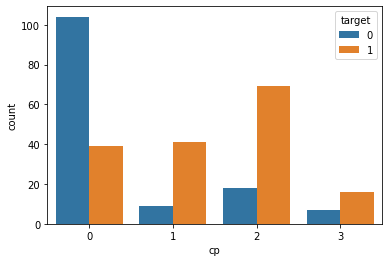

In [15]:
sns.countplot(data.cp,hue= data.target)

- as the cp increases there are more chances to get the attack

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thal', ylabel='count'>

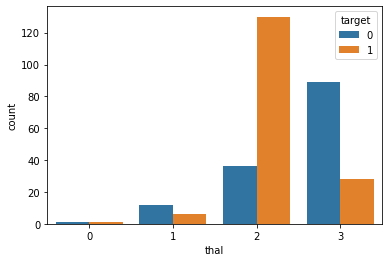

In [16]:
sns.countplot(data.thal,hue=data.target)

In [17]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
accuracy_score(y_test,pred_knn)*100

86.81318681318682

# since the accuracy is too low we can use the hyper parameter tuning

- here in our dataset we can see that there are some categorical datset and some of the continous values
- although there are some of the outliers in the continous variable so we have to remove them 
- so what we can do is that we can scaling the data 
- by doing this we can actually increase the accuracy
- we will use the cross validation score so that we can get the exact value of the k in this k nearest neighbour

# first lets check all the feature which are important for us

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [95]:
print(selection.feature_importances_)

[0.05777271 0.03420713 0.17641629 0.04516171 0.04932782 0.01689248
 0.03776017 0.0664337  0.09933266 0.07058126 0.05714913 0.15353027
 0.13543466]


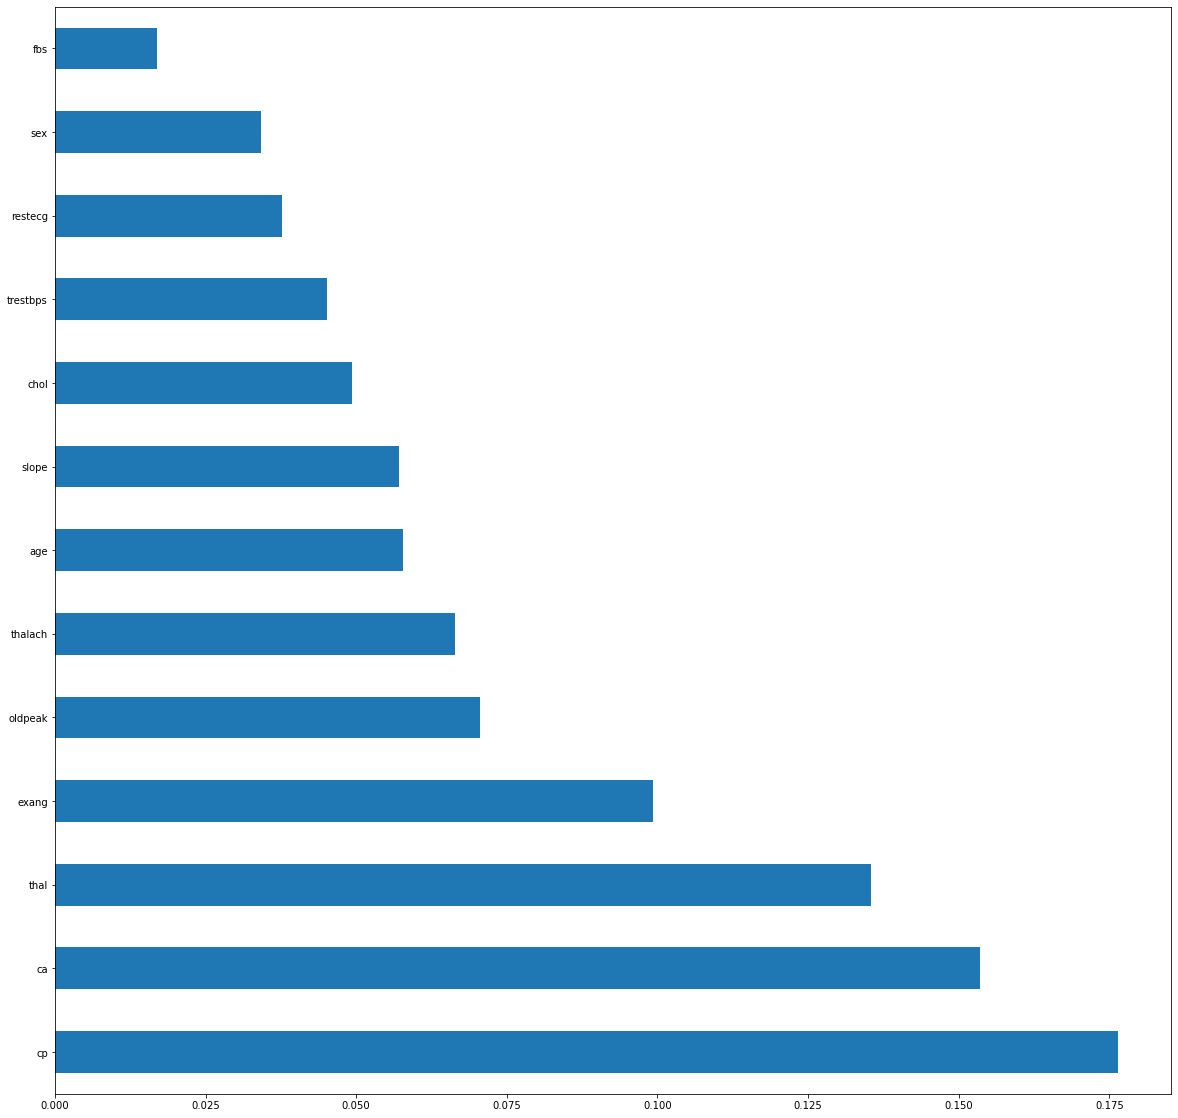

In [96]:
plt.figure(figsize=(20,20))
imp_feature = pd.Series(selection.feature_importances_,index=x.columns)
imp_feature.nlargest(15).plot(kind = 'barh')
plt.show()

- from here we can see that cp is the main feature in our dataset

 - we will store all the categorical value into dummy so that we will create a seprate column for each category

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
data = pd.Series() 

C:\Users\Asus\AppData\Local\Temp/ipykernel_17220/2635633597.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.Series()


In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
knnn_score=[]
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn,x,y,cv=10)
    knnn_score.append(score.mean())

In [101]:
score.mean()*100

65.35483870967742

# Random forest

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

In [52]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rand = RandomForestClassifier(criterion='gini',n_estimators=100,random_state=0)

In [80]:
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [81]:
predict_rand = rand.predict(x_test)

In [82]:
cn = confusion_matrix(y_test , predict_rand)

In [83]:
cn

array([[32,  9],
       [ 8, 42]], dtype=int64)

In [84]:
accuracy_score(y_test,predict_rand)*100

81.31868131868131

# decision tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dsc = DecisionTreeClassifier(criterion='gini',
    splitter='best')

In [87]:
dsc.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
predict_dsc= dsc.predict(x_test)

In [89]:
cn = confusion_matrix(y_test,predict_dsc)

In [90]:
cn

array([[31, 10],
       [16, 34]], dtype=int64)

In [92]:
accuracy_score(y_test,predict_dsc)*100

71.42857142857143